In [881]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from utils import N

np.set_printoptions(formatter={"float":"{:0.2f}".format})

df = pd.read_csv("spam.csv")
data = df.to_numpy()


# Carga de datos 

In [106]:
x = []
for i in range(len(data)):
    x.append(np.array([float(i) for i in data[i][0].split()]))
x = np.array(x)

In [249]:
Num_Spam = sum(x[:,-1] == True)
Num_NSpam = sum(x[:,-1] == False)

print(Num_Spam/len(data))
print(Num_NSpam/len(data))

# Reorganizacion de las listas
x = np.random.permutation(x)
#eleccion de los datos de entrenamiento 
x_train = x[0:int(len(x)*0.7)]
x_val = x[int(len(x)*0.7)-1:-1]



0.28969251595436085
0.7103074840456391


vamos a ver que tipos de clases tenemos , para poder calcular los parametros de cada clase separamos en dos grupos, los que son spam y los que no para calcular los respectivos $q_{k}$ de cada clase

In [281]:
spam_train  = x_train[x_train[:,-1]==1][:,0:-1]
Nspam_train = x_train[x_train[:,-1]==0][:,0:-1]


In [308]:
np.unique(spam_train[:,0,],return_counts = True)

(array([ 0.,  1.,  2.,  3.,  4.,  6.,  8., 10., 13., 14., 42., 43., 48.,
        51.]),
 array([725, 210,  93,  18,   2,   1,   2,   1,   1,   1,   1,   1,   1,
          1]))

In [271]:
spam_train

array([[1., 0.],
       [0., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [256]:
y

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [287]:
y[:,0,]

array([0, 3, 6])

In [233]:
y = arr
y[:,-1:]==5

array([[False],
       [ True],
       [False]])

In [246]:
np.unique(Num_spam[3], return_counts =True)

(array([0., 1., 2., 3.]), array([1976,   22,    2,    1]))

In [217]:
for i in range(len(x[0])):
    if x[0][i] == 7:
        print(i)

112
277


# Cancer de Seno 

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

1. Title: Wisconsin Breast Cancer Database (January 8, 1991)

2. Sources:
   -- Dr. WIlliam H. Wolberg (physician)
      University of Wisconsin Hospitals
      Madison, Wisconsin
      USA
   -- Donor: Olvi Mangasarian (mangasarian@cs.wisc.edu)
      Received by David W. Aha (aha@cs.jhu.edu)
   -- Date: 15 July 1992

3. Past Usage:

   Attributes 2 through 10 have been used to represent instances.
   Each instance has one of 2 possible classes: benign or malignant.

   1. Wolberg,~W.~H., \& Mangasarian,~O.~L. (1990). Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology. In
      {\it Proceedings of the National Academy of Sciences}, {\it 87},
      9193--9196.
      -- Size of data set: only 369 instances (at that point in time)
      -- Collected classification results: 1 trial only
      -- Two pairs of parallel hyperplanes were found to be consistent with
         50% of the data
         -- Accuracy on remaining 50% of dataset: 93.5%
      -- Three pairs of parallel hyperplanes were found to be consistent with
         67% of data
         -- Accuracy on remaining 33% of dataset: 95.9%

   2. Zhang,~J. (1992). Selecting typical instances in instance-based
      learning.  In {\it Proceedings of the Ninth International Machine
      Learning Conference} (pp. 470--479).  Aberdeen, Scotland: Morgan
      Kaufmann.
      -- Size of data set: only 369 instances (at that point in time)
      -- Applied 4 instance-based learning algorithms 
      -- Collected classification results averaged over 10 trials
      -- Best accuracy result: 
         -- 1-nearest neighbor: 93.7%
         -- trained on 200 instances, tested on the other 169
      -- Also of interest:
         -- Using only typical instances: 92.2% (storing only 23.1 instances)
         -- trained on 200 instances, tested on the other 169

4. Relevant Information:

   Samples arrive periodically as Dr. Wolberg reports his clinical cases.
   The database therefore reflects this chronological grouping of the data.
   This grouping information appears immediately below, having been removed
   from the data itself:

     Group 1: 367 instances (January 1989)
     Group 2:  70 instances (October 1989)
     Group 3:  31 instances (February 1990)
     Group 4:  17 instances (April 1990)
     Group 5:  48 instances (August 1990)
     Group 6:  49 instances (Updated January 1991)
     Group 7:  31 instances (June 1991)
     Group 8:  86 instances (November 1991)
     -----------------------------------------
     Total:   699 points (as of the donated datbase on 15 July 1992)

   Note that the results summarized above in Past Usage refer to a dataset
   of size 369, while Group 1 has only 367 instances.  This is because it
   originally contained 369 instances; 2 were removed.  The following
   statements summarizes changes to the original Group 1's set of data:

   #####  Group 1 : 367 points: 200B 167M (January 1989)
   #####  Revised Jan 10, 1991: Replaced zero bare nuclei in 1080185 & 1187805
   #####  Revised Nov 22,1991: Removed 765878,4,5,9,7,10,10,10,3,8,1 no record
   #####                  : Removed 484201,2,7,8,8,4,3,10,3,4,1 zero epithelial
   #####                  : Changed 0 to 1 in field 6 of sample 1219406
   #####                  : Changed 0 to 1 in field 8 of following sample:
   #####                  : 1182404,2,3,1,1,1,2,0,1,1,1

5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

9. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)


In [1050]:
Names = ["ID ","Grosor del tumor","Uniformidad tamaño",
            "forma celula","Adhesion marginal","Tamaño celula epitelial",
            "Nucleos desnudos","Cromatina blanda","Núcleolos normales",
           "Mitosis de celulas","Clase"]
df1 = pd.read_csv("breast-cancer-wisconsin.data",names =Names)
df1.head()
data = df1.to_numpy()

Se trabaja con arreglos de numpy para alguno calculos numéricos , luego se cambia el orden de los datos. En principio se entrena un clasificador sin los datos faltantes para tenerlo como referencia y ver si queda bien hecho el clasificador sto se hace identificando los datos inexistentes, utilizando la función *where* que retorna la columna y el indice en donde  existe un dato identificado como "?", que se debe rellenar antes de poder calcular los estimadores del clasificador bayesiano ingenuo 

In [1051]:
data = np.random.permutation(data)
index = np.where(data == "?")
data_ref = np.delete(data,index,axis=0)

x_train = data_ref[0:int(len(data_ref)*0.7)]  #70% entrenamiento
x_val = data_ref[int(len(data_ref)*0.7)-1:-1] #30% validacion
x_val = x_val.astype(np.float)

# correcion de tipo de datos en la 6 columna para trabajar con float
x_val[:,6] = x_val[:,6].astype(np.float) 

Lo que se hace ahora es clasificar en dos grupos de datos, los pertenecientes al grupo Beningno que se identifican con el valor "2" y otro del grupo Maligno identificado con el "4". Esto con el fin de calcular los estimadores correspondientes a cada clase de cada atributo.



In [1052]:
Benigno = x_train[x_train[:,-1]==4]
Benigno[:,6] = Benigno[:,6].astype(np.float) 

Maligno = x_train[x_train[:,-1]==2]
Maligno[:,6] = Maligno[:,6].astype(np.float) 

NB_ref = len(Benigno)
NM_ref = len(Maligno)
NT = NB_ref + NM_ref


print("Numero de Tumores Beningnos = {}".format(NB_ref))
print("Numero de Tumores Malignos  = {}".format(NM_ref))
print("Numero datos totales entrenamiento = {}".format(NT))


Numero de Tumores Beningnos = 170
Numero de Tumores Malignos  = 307
Numero datos totales entrenamiento = 477


En este caso vamos a muestrear nuestros valores pertenecientes a cada atributo asumiendo que siguen una distribución normal dada por 

$$\mathcal{N}(\vec{x}|\mu,\sigma^{2})=\frac{1}{(2\pi\sigma)^{1/2}}e^{-\frac{1}{2\sigma^{2}}(x-\mu)^{2}}$$

Suponemos que el conjunto de observaciones de los atributos de las variables se distribuyen de manera uniforme y son independientes entre si. Vemos que la probabilidad conjunta de dos eventos independientes está dada por el producto de las probabilidades marginales para cada evento por separa, esto se representa de la siguiente 

$$P(\vec{x}|\mu,\sigma^{2}) = \prod_{n=1}^{N}\mathcal{N}(x_{n}|\mu,\sigma_{2})$$

luego los clasificadores se calculan de la siguiente manera 

$$C= \underset{C\in\{Spam,NoSpam\}}{\mathrm{ArgMax}} \left[ P(C)\prod_{n=1}^{N}\mathcal{N}(x_{n}|\mu,\sigma_{2})\right] $$

Utilizando el estimador de máxima verosimilitud los parámetros de la distribución son el promedio y la varianza, dadas por 

$$\hat{\mu}_{EMV} = \frac{1}{n}\sum_{i=1}^{n}x^{(i)}\qquad \hat{\sigma}^{2}_{EMV} = \frac{1}{n}(x^{(i)}-\hat{\mu}_{EMV})^{2}$$

Entonces podemos calcular estos parámetros de la siguiente forma

In [1053]:
#Calculo de los parámetros de cada clase

muM = [np.mean(Maligno[:,1:-1][:,i]) for i in range(np.shape(Maligno[:,1:-1])[1])]
muM = np.array(muM)
stdM = [np.std(Maligno[:,1:-1][:,i]) for i in range(np.shape(Maligno[:,1:-1])[1])]
stdM = np.array(std)

muB = [np.mean(Benigno[:,1:-1][:,i]) for i in range(np.shape(Benigno[:,1:-1])[1])]
muB = np.array(muB)
stdB = [np.std(Benigno[:,1:-1][:,i]) for i in range(np.shape(Benigno[:,1:-1])[1])]
stdB = np.array(stdB)

Estos son los parámetros obtenidos para cada atributo de cada grupo de datos 

In [1054]:
# promedio
print("promedio Beningno ={}".format(muB))
print("promedio Maligno  ={}".format(muM))

# desviacion estandar

print("desviacion Beningno ={}".format(stdB))
print("desviacion Maligno  ={}".format(stdM))




promedio Beningno =[7.15 6.68 6.59 5.75 5.41 7.66 6.06 5.96 2.54]
promedio Maligno  =[2.93 1.29 1.40 1.37 2.14 1.38 2.12 1.28 1.07]
desviacion Beningno =[2.45 2.77 2.66 3.24 2.42 3.11 2.28 3.28 2.50]
desviacion Maligno  =[2.44 2.70 2.61 3.21 2.44 3.06 2.27 3.38 2.57]


Ahora se construye una funcion que calcule las constante para cada clase y nos entregue la predicción, por tanto se tiene

In [1055]:
def MVE(x):
    id_muestra = x[0]
    x = x[1:-1]
    CB = (NB_ref/NT)*np.prod(N(x,muB,stdB))
    CM = (NM_ref/NT)*np.prod(N(x,muM,stdM))
    clases={CM:4.0,CB:2.0}
    return id_muestra, clases[max(CB,CM)] 

Ahora vamos a ver una predicción utilizando el conjunto de datos de validación, contando los aciertos de cada uno de los datos que proporciona el conjunto de validación y contrastando con el obtenido por el modelo 

In [1056]:
def rend(x_val):
    val = np.array([MVE(x_val[i]) for i in range(len(x_val))])
    y = val[:,-1]  == x_val[:,-1]
    return sum(y)/len(x_val)

In [1063]:
print("Rendimiento del clasificador = {}".format(rend(x_val)))

Rendimiento del clasificador = 0.9804878048780488


Este fue el modelo entrenado para el conjunto de datos que no incluye los datos que contenían "?", ahora se buscan propuestas para rellenar los datos faltanes tratando de obtener el mayor rendimiento segun la funcion construida anteriormente. 

Para esto debemos hacer que haga muchas pruebas en los 16 datos y asi elegir el valor que mas rendimiento de en el clasificador. Se construyen las funciones

In [1075]:
def entrenamiento(data,comb):
    data = np.random.permutation(data)
    index = np.where(data == "?")
    data[index] = comb


    x_train = data[0:int(len(data)*0.7)]  #70% entrenamiento
    x_val = data[int(len(data)*0.7)-1:-1] #30% validacion
    x_val[:,6] = x_val[:,6].astype(np.float) 


    Benigno = x_train[x_train[:,-1]==4]
    Benigno[:,6] = Benigno[:,6].astype(np.float) 

    Maligno = x_train[x_train[:,-1]==2]
    Maligno[:,6] = Maligno[:,6].astype(np.float) 

    NB_ref = len(Benigno)
    NM_ref = len(Maligno)
    NT = NB_ref + NM_ref

    muM = [np.mean(Maligno[:,1:-1][:,i]) for i in range(np.shape(Maligno[:,1:-1])[1])]
    muM = np.array(muM)
    stdM = [np.std(Maligno[:,1:-1][:,i]) for i in range(np.shape(Maligno[:,1:-1])[1])]
    stdM = np.array(std)

    muB = [np.mean(Benigno[:,1:-1][:,i]) for i in range(np.shape(Benigno[:,1:-1])[1])]
    muB = np.array(muB)
    stdB = [np.std(Benigno[:,1:-1][:,i]) for i in range(np.shape(Benigno[:,1:-1])[1])]
    stdB = np.array(stdB)
    
    return muM,muB,stdM,stdB

comb = np.random.randint(10,size=16)
muM,muB,stdM,stdB = entrenamiento(data,comb)
print(rend(x_val))
print(comb)

0.9804878048780488
[0 2 6 7 1 4 7 1 8 6 6 9 4 3 4 6]


Con un vector de prueba se calcula el rendimiento, hagamos esto varias veces y elijamos el que tenga el mayor valor o el rendimiento 

In [1081]:
Rend = []; Comb = []
for _ in range(10000):
    comb = np.random.randint(10, size=16)
    muM,muB,stdM,stdB = entrenamiento(data,comb)
    Rend.append(rend(x_val))
    Comb.append(comb)
    

Text(0, 0.5, 'Redimiento')

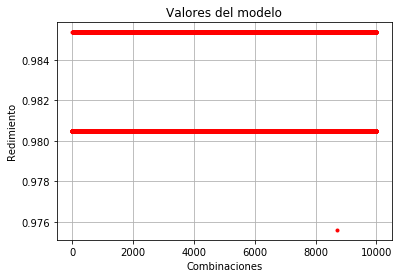

In [1084]:
plt.plot(Rend,"r.")
plt.grid(True)
plt.title("Valores del modelo")
plt.xlabel("Combinaciones")
plt.ylabel("Redimiento")

In [1088]:
print("Redimiento maximo = {}".format(Rend[np.argmax(Rend)]))
print("Combinación utilizada {} ".format(Comb[np.argmax(Rend)]))

Redimiento maximo = 0.9853658536585366
Combinación utilizada [3 4 2 2 4 1 2 2 0 3 3 1 8 8 3 9] 
